In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('ccpp.csv')
df['bias'] =1
#Inputs and Output
X = scale(np.array(df.drop(['PE'],1)))
y = np.array(df['PE'])
X[:,4]=1 #adding bias element

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20,random_state = 42)
df.head()

,AT,V,AP,RH,PE,bias
0,8.34,40.77,1010.84,90.01,480.48,1
1,23.64,58.49,1011.40,74.20,445.75,1
2,29.74,56.90,1007.15,41.91,438.76,1
3,19.07,49.69,1007.22,76.79,453.09,1
4,11.80,40.66,1017.13,97.20,464.43,1


In [12]:
def initialize_parameters(n_x):
    """
    Argument:
    n_x -- size of the input
    
    Returns:
    parameters -- python dictionary containing your parameters:

    T --  theta array of shape (n_x+1,1)
    """
    np.random.seed(1)
    T = np.random.randn(1,n_x)*0.01
    
    return T

In [13]:
def prediction(X, Theta):

    """
    Implement the linear regression equation.
    Arguments:
    X --  input data

    T -- parameter array

    Returns:

    y_pred -- the predicted values
    """
   
    y_pred = np.dot(X,np.transpose(Theta))

    return y_pred

In [14]:
def compute_cost(X, y, parameters):

    return np.sum(np.square(prediction(X, parameters) - y)) / (2 * len(y))

In [15]:
def gradient_descent_multi(X, y, theta, alpha, iterations):

    theta = np.zeros(X.shape[1])
    m = len(X)
    loss = np.zeros(iterations)

    for i in range(iterations):

        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        loss[i] = compute_cost(X,y,theta)


    return theta, loss 

Text(0.5,1,'Error vs. Training Epoch')

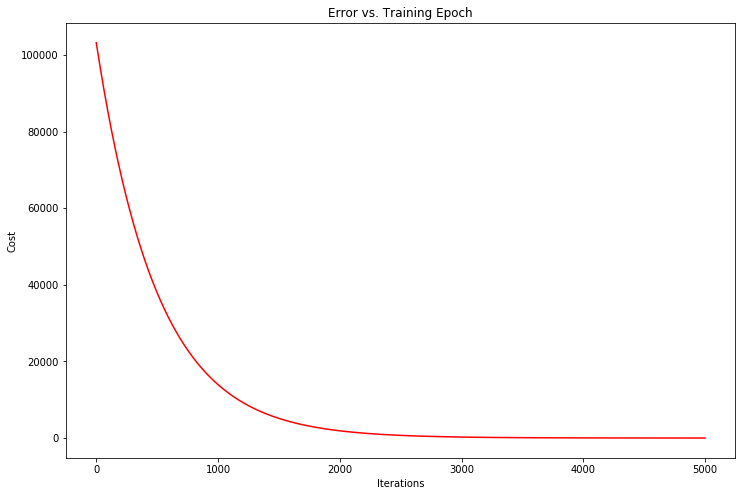

In [16]:
parameters = initialize_parameters(X_train.shape[1])
iterations = 5000
learning_rate = 0.001
parameters, loss =  gradient_descent_multi(X_train, y_train, parameters, learning_rate, iterations)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(5000), loss, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [17]:
#predictions
testpred = prediction(X_test, parameters)
print(parameters)
print(compute_cost(X_test,y_test,parameters))

#Scikit learn
#Coefficients: [-14.73251595  -2.98326107   0.34593379  -2.30884968]
#Intercept: 454.4289437515408

[-9.70859997e+00 -6.38183502e+00  1.40437105e+00 -2.97970383e-01
  4.51358125e+02]
15.894347965365709


In [18]:
#References
#https://crsmithdev.com/blog/ml-linear-regression/